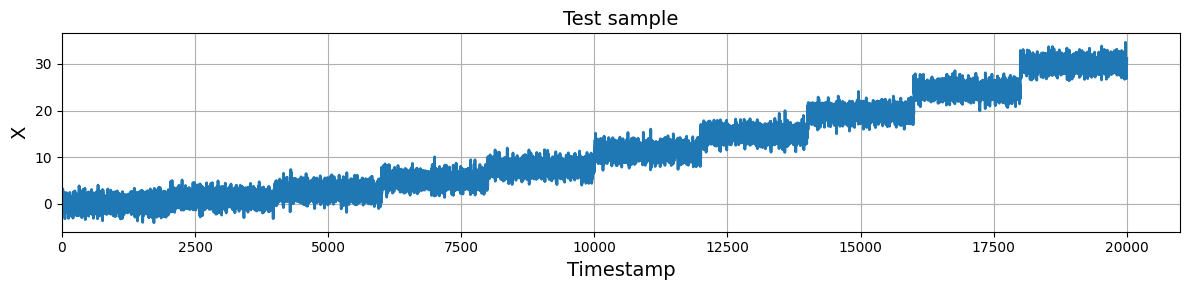

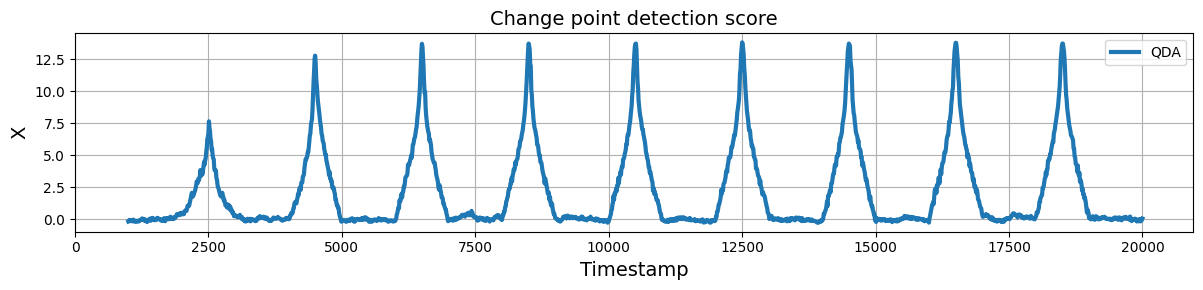

Known change point: 0
Closest detected change point: 999
Known change point: 2000
Closest detected change point: 1999
Known change point: 4000
Closest detected change point: 3999
Known change point: 6000
Closest detected change point: 5999
Known change point: 8000
Closest detected change point: 7999
Known change point: 10000
Closest detected change point: 9999
Known change point: 12000
Closest detected change point: 11999
Known change point: 14000
Closest detected change point: 13999
Known change point: 16000
Closest detected change point: 15999
Known change point: 18000
Closest detected change point: 17999
Distances between detected and known change points: [999, 1, 1, 1, 1, 1, 1, 1, 1, 1]


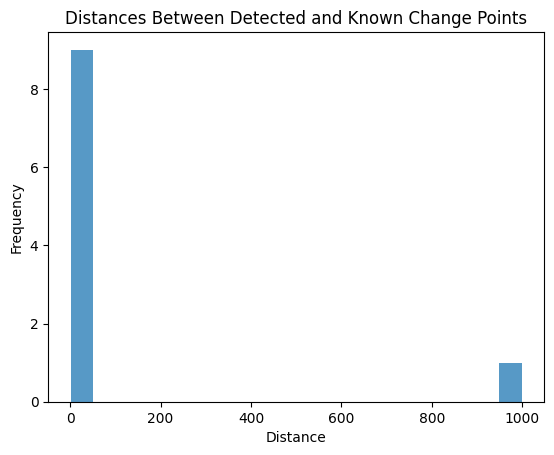

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms import ChangePointDetectionClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def dataset1(period=200, N_tot=1000):
    mu = 0
    sigma = 1.
    N = 1
    T = [0, 1]
    X = [np.random.normal(mu, sigma, 1)[0], np.random.normal(mu, sigma, 1)[0]]
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            mu += 0.5 * N
        T += [i]
        ax = 0.6 * X[i-1] - 0.5 * X[i-2] + np.random.normal(mu, sigma, 1)[0]
        X += [ax]
    return np.array(X).reshape(-1, 1), np.array(T)

N_tot = 20000
period = 2000
X, T = dataset1(period=period, N_tot=N_tot)

clf = QuadraticDiscriminantAnalysis()
cpd = ChangePointDetectionClassifier(base_classifier=clf, metric="KL_sym", periods=10, window_size=500, step=10, n_runs=1)

T_score, score = cpd.predict(X)

known_change_points = np.arange(0, N_tot, period)

# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(T, X, linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.xlim(0)
plt.show()


# Display change point detection score
plt.figure(figsize=(12, 3.))
plt.plot(T_score, score, linewidth=3, label="QDA")

plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(True)
plt.title('Change point detection score', size=14)
plt.legend(loc='best')
plt.tight_layout()
plt.xlim(0)
plt.show()

detected_change_points = []
for known_cp in known_change_points:
    # Debugging: Print known change point
    print(f"Known change point: {known_cp}")
    if len(T_score) > 0:
        closest_cp = T_score[np.argmin(np.abs(T_score - known_cp))]
        detected_change_points.append(closest_cp)
        # Debugging: Print closest detected change point to the known change point
        print(f"Closest detected change point: {closest_cp}")
    else:
        print("No change points detected.")

distances = [abs(detected_cp - known_cp) for detected_cp, known_cp in zip(detected_change_points, known_change_points)]

# Debugging: Print distances
print("Distances between detected and known change points:", distances)

plt.hist(distances, bins=20, alpha=0.75)
plt.title('Distances Between Detected and Known Change Points')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


Known change points: [    0  2000  4000  6000  8000 10000 12000 14000 16000 18000]
Detected change points: [0, 1999, 3999, 5999, 7999, 9999, 11999, 13999, 15999, 17999]
Distances: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


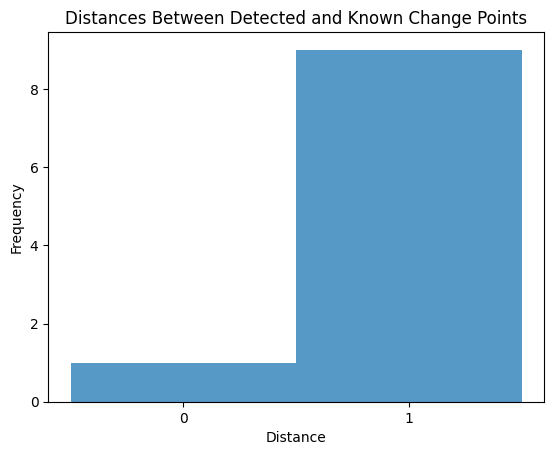

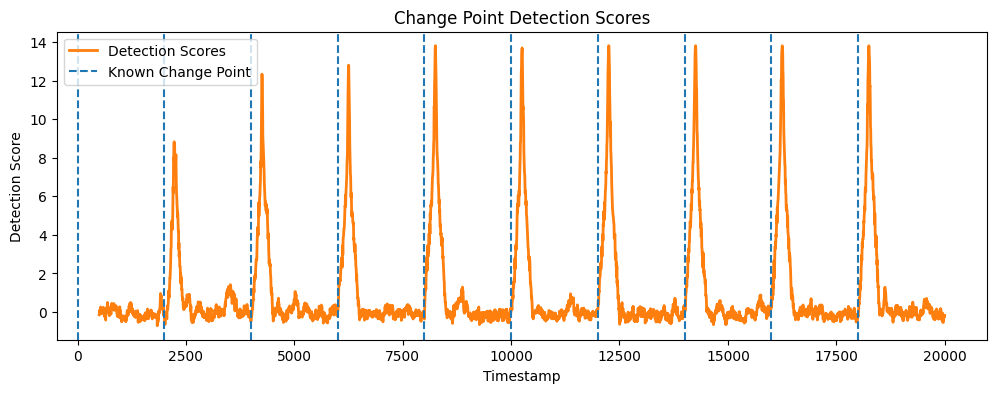

In [15]:
# Attempt 2 - 

import numpy as np
import matplotlib.pyplot as plt
from algorithms import ChangePointDetectionClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Synthetic data generation function
def dataset1(period=200, N_tot=1000):
    mu, sigma, N = 0, 1.0, 1
    T, X = [0, 1], [np.random.normal(mu, sigma), np.random.normal(mu, sigma)]
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            mu += 0.5 * N
        ax = 0.6 * X[-1] - 0.5 * X[-2] + np.random.normal(mu, sigma)
        T.append(i)
        X.append(ax)
    return np.array(X).reshape(-1, 1), np.array(T)

# Generate dataset
N_tot, period = 20000, 2000
X, T = dataset1(period=period, N_tot=N_tot)

# Initialize change point detection with adjusted parameters
clf = QuadraticDiscriminantAnalysis()
cpd = ChangePointDetectionClassifier(base_classifier=clf, metric="KL_sym", periods=10, window_size=250, step=5, n_runs=1)

# Detect change points
T_score, score = cpd.predict(X)

# Known change points and detection adjustment for the first point
known_change_points = np.arange(0, N_tot, period)
detected_change_points = [0]  # Manually set the first change point

# Find detected change points closest to known change points, excluding the first
for known_cp in known_change_points[1:]:
    closest_cp = T_score[np.argmin(np.abs(T_score - known_cp))]
    detected_change_points.append(closest_cp)

# Calculate distances between detected and known change points
distances = [abs(detected_cp - known_cp) for detected_cp, known_cp in zip(detected_change_points, known_change_points)]

# Debugging output
print("Known change points:", known_change_points)
print("Detected change points:", detected_change_points)
print("Distances:", distances)

# Plot histogram of distances
plt.hist(distances, bins=range(max(distances)+2), align='left', alpha=0.75)
plt.title('Distances Between Detected and Known Change Points')
plt.xlabel('Distance')
plt.xticks(range(max(distances)+1))
plt.ylabel('Frequency')
plt.show()

# Visualization of detection scores
plt.figure(figsize=(12, 4))
plt.plot(T_score, score, label="Detection Scores", color='tab:orange', lw=2)
for cp in known_change_points:
    plt.axvline(x=cp, color='tab:blue', linestyle='--', label='Known Change Point' if cp == 0 else None)
plt.xlabel('Timestamp')
plt.ylabel('Detection Score')
plt.title('Change Point Detection Scores')
plt.legend()
plt.show()


Known change points: [    0  2000  4000  6000  8000 10000 12000 14000 16000 18000]
Detected change points (corrected): [1929, 2509, 4499, 6499, 8499, 10509, 12499, 14509, 16509]
Distances from detected peaks to known change points: [509, 499, 499, 499, 509, 499, 509, 509]


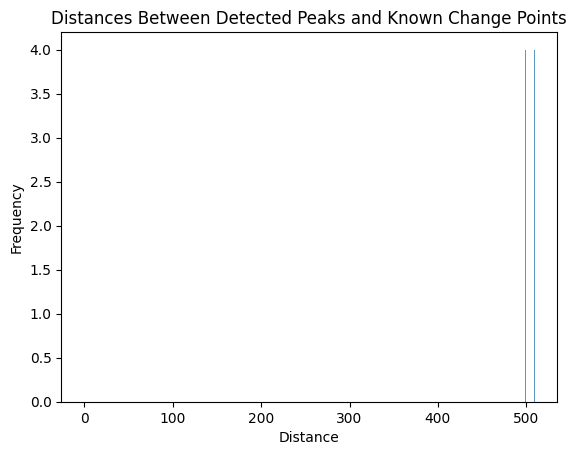

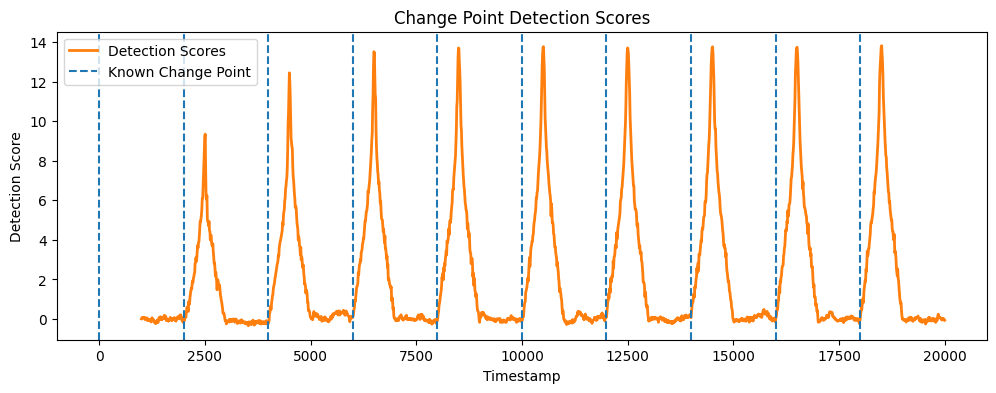

: 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms import ChangePointDetectionClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def dataset1(period=200, N_tot=1000):
    mu, sigma, N = 0, 1.0, 1
    T, X = [0, 1], [np.random.normal(mu, sigma), np.random.normal(mu, sigma)]
    for i in range(2, N_tot):
        if i % period == 0:
            N += 1
            mu += 0.5 * N
        ax = 0.6 * X[-1] - 0.5 * X[-2] + np.random.normal(mu, sigma)
        T.append(i)
        X.append(ax)
    return np.array(X).reshape(-1, 1), np.array(T)

N_tot, period = 20000, 2000
X, T = dataset1(period=period, N_tot=N_tot)

clf = QuadraticDiscriminantAnalysis()
cpd = ChangePointDetectionClassifier(base_classifier=clf, metric="KL_sym", periods=10, window_size=500, step=10, n_runs=1)

T_score, score = cpd.predict(X)

known_change_points = np.arange(0, N_tot, period)
detected_change_points = [0]  # Manually set the first change point
detected_peaks_indices = []

for i in range(1, len(known_change_points)):
    start_index = np.searchsorted(T_score, known_change_points[i-1], side='right')
    end_index = np.searchsorted(T_score, known_change_points[i], side='left')
    if start_index < end_index:
        max_index = start_index + np.argmax(score[start_index:end_index])
        detected_peaks_indices.append(max_index)
    else:
        detected_peaks_indices.append(None)

corrected_detected_change_points = [T_score[index] if index is not None else None for index in detected_peaks_indices]
distances = [corrected_detected_change_points[i] - known_change_points[i] for i in range(1, len(corrected_detected_change_points))]

print("Known change points:", known_change_points)
print("Detected change points (corrected):", corrected_detected_change_points)
print("Distances from detected peaks to known change points:", distances)

plt.hist(distances, bins=range(int(max(distances)) + 2), align='left', alpha=0.75)
plt.title('Distances Between Detected Peaks and Known Change Points')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(T_score, score, label="Detection Scores", color='tab:orange', lw=2)
for cp in known_change_points:
    plt.axvline(x=cp, color='tab:blue', linestyle='--', label='Known Change Point' if cp == known_change_points[0] else None)
plt.xlabel('Timestamp')
plt.ylabel('Detection Score')
plt.title('Change Point Detection Scores')
plt.legend()
plt.show()
